In [ ]:
#PARSER
#this is very slapdash and specific to the sample spreadsheet
#

#from google.colab import drive
#drive.mount('/content/gdrive')

import numpy as np
import csv

file = open('SeizuretrackerSample.csv')
csvreader = csv.reader(file)

rows = []

#get through initial headers 
for i in range(0,25):
  nextRow = next(csvreader) 

for i in range(0, 2639-25):
  nextRow = next(csvreader)
  rows.append(nextRow)



In [ ]:
import numpy as np
from datetime import datetime

def getNormalizedPhase(list):
  dateList = []
  phaseArray = np.zeros((len(list),1))

  i = 0
  for row in rows:
    date = row[1] 
    dateTime =  datetime.strptime(date, '%Y-%m-%d %X')   #'%m/%d/%y %H:%M'

    indexSpace = date.index(' ')
    indexColon1 = date.index(':')
    indexColon2 = date.index(':',indexColon1+1, len(date)-1)

    dayTime = date[indexSpace+1: len(date)]
    hour = float(date[indexSpace+1: indexColon1])
    minute = float(date[indexColon1+1: indexColon2])
    second = float(date[indexColon2+1: len(date)])
    
    phase = (60*hour + minute + second/60)/(60*24) #normalized to the interval [0,1)

    dateList.append(dateTime)
    phaseArray[i] = phase

    i = i+1

  return [dateList, phaseArray]


In [ ]:
import numpy as np

def dyadicPartition(array, n):
  densityArray = np.zeros((2**n, 1))
  for i in range (0,2**n):
    lower = 2**(-n)*(i)
    upper = 2**(-n)*(i+1)

    partitionIndxLower = np.where(array>=lower)
    partitionLower = partitionIndxLower[0]
    #print(partitionLower)

    partitionIndxUpper = np.where(array<upper)
    partitionUpper = partitionIndxUpper[0]
    #print(partitionUpper)

    partition = np.intersect1d(partitionLower, partitionUpper)
    #print(partition)

    density = len(partition)
    densityArray[i] = density
  return densityArray

In [ ]:
import numpy as np
from datetime import datetime

def ISICalc(dateList):
  ISI = np.zeros((len(dateList)-1, 1))

  for i in range (0,len(dateList)-1):
    delta = dateList[i+1]- dateList[i]
    isi =  delta.total_seconds()
    ISI[i] = isi/(60*60*24) #express ISIs in days
  return ISI


In [ ]:
import numpy as np
def delayTimeEmbedding(t,d, ISI):
  ISI = np.reshape(ISI, (-1,1))
  embedMat = np.zeros((len(ISI),d))
  t=1 #just for now
  for i in range (0,d):
    embedMat[0+i:len(ISI),i] = ISI[0:len(ISI)-i,0]
  
  return embedMat

In [ ]:
a = np.array([0,0.20,0.25,0.35,0.4,0.5,0.75,0.8,0.9,0.95,0.99])
densityArray = dyadicPartition(a, 2)
print(densityArray)

[[2.]
 [3.]
 [1.]
 [5.]]


In [ ]:
[dateList, phaseArray] = getNormalizedPhase(rows)
ISI = ISICalc(dateList)
embedMat = delayTimeEmbedding(1,2,ISI)

Text(0, 0.5, 'Seizure Counts')

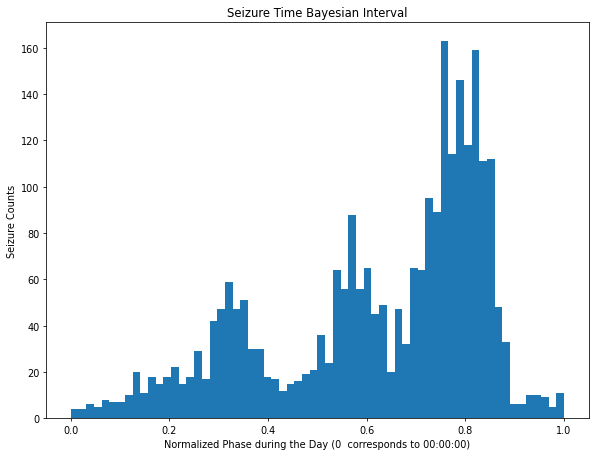

In [ ]:
import matplotlib.pyplot as plt

n=6
densityArray = dyadicPartition(phaseArray, n)

w = 10
h = 7.5
d = 70
plt.figure(figsize=(w, h), dpi=d)

bins = []
for i in range (0, 2**(n)+1):
  bins.append(2**(-n)*(i))

plt.hist(phaseArray, bins)

plt.title('Seizure Time Bayesian Interval')
plt.xlabel('Normalized Phase during the Day (0  corresponds to 00:00:00)')
plt.ylabel('Seizure Counts')

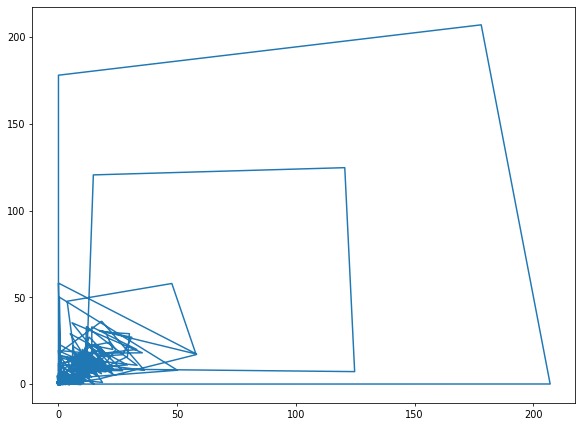

[[ 2.91666667  0.        ]
 [ 3.99305556  2.91666667]
 [ 2.98611111  3.99305556]
 ...
 [16.98055556  7.18611111]
 [19.         16.98055556]
 [17.96319444 19.        ]]


In [ ]:
import matplotlib.pyplot as plt

w = 10
h = 7.5
d = 70
plt.figure(figsize=(w, h), dpi=d)

plt.plot(embedMat[:,1],embedMat[:,0])
plt.show()
print(embedMat)


In [ ]:
np.shape(ISI)
ISI = np.reshape(ISI, (-1,1))
np.shape(ISI)

(2613, 1)

In [73]:
import csv

with open('InterSeizureInterval.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile, delimiter=',')

  for i in range(0, len(ISI)):
    nextRow = ISI[i]
    writer.writerow(nextRow)
    #next(writer)



In [71]:
print(ISI)

[[ 2.91666667]
 [ 3.99305556]
 [ 2.98611111]
 ...
 [16.98055556]
 [19.        ]
 [17.96319444]]
